------------------------------------------------------------
mfcc was loaded
------------------------------------------------------------
------------------------------------------------------------
pncc was loaded
------------------------------------------------------------
There are 2023 total training examples.


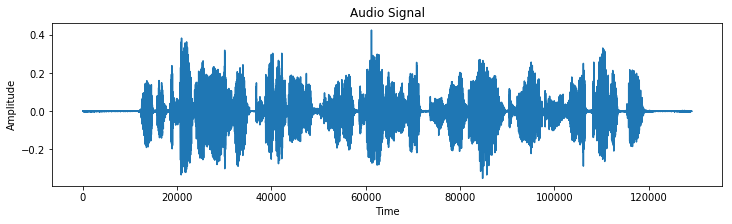

In [1]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio, plot_mfcc_feature
from IPython.display import Audio
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# 1つのトレーニングデータからラベルと音声特徴量を抽出しています
vis_text, vis_raw_audio, vis_pncc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

# 生の音声データを確認する
plot_raw_audio(vis_raw_audio)
# play the audio file
Audio(vis_audio_path)

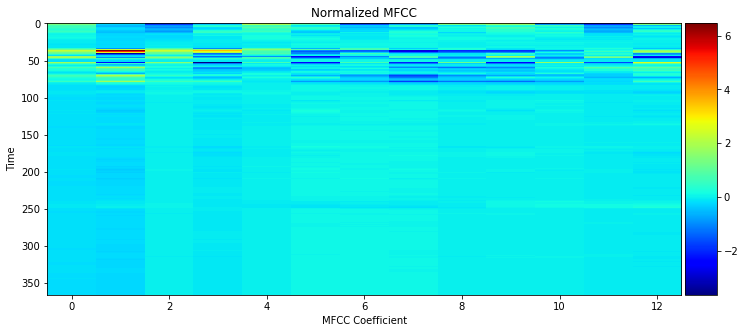

In [2]:
plot_mfcc_feature(vis_pncc_feature)

In [3]:
###############################################
# この章を始める前に、こちらのコードを実行してください #
###############################################

from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))


%load_ext autoreload
%autoreload 2
from sample_models import *
from train_utils import *

/Users/nakamurataiki/anaconda/envs/py35_tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/nakamurataiki/anaconda/envs/py35_tf/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
model_0 = simple_rnn_model(input_dim=13) # 特徴としてMFCCを使うのならば、input_dim=13を指定
                                         # スプクトログラムを使うならば、input_dim=161を指定

train_model(input_to_softmax=model_0, 
            pickle_path='model_0.pickle', 
            save_model_path='model_0.h5',
            epochs=20,
            spectrogram=False) # 特徴としてMFCCを使うのならば、spectrogramはFalseを指定

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
rnn (GRU)                    (None, None, 29)          3741      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 3,741
Trainable params: 3,741
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
101/101 [==============================] - 1714s 17s/step - loss: 527.7168 - val_loss: 488.3294

In [5]:
model_2 = cnn_rnn_model(input_dim=13, # MFCC特徴量を用いる場合は、input_dim=13に変更してください。
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5', 
            epochs=10,
            spectrogram=False) # MFCC特徴量を用いる場合は、input_dim=13に変更してください。

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         28800     
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         240600    
_________________________________________________________________
bn_rnn_1d (BatchNormalizatio (None, None, 200)         800       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 29)          5829      
___________________________________________________________

In [6]:
model_3 = deep_rnn_model(input_dim=13, # MFCC特徴量を用いる場合は、input_dim=13に変更してください。
                         units=200,
                         recur_layers=2) 

train_model(input_to_softmax=model_3, 
            pickle_path='model_3.pickle', 
            save_model_path='model_3.h5', 
            spectrogram=False) # MFCC特徴量を用いる場合は、input_dim=13に変更してください。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 200)         171200    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 200)         800       
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 200)         320800    
_________________________________________________________________
bt_rnn_last_rnn (BatchNormal (None, None, 200)         800       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total para

ValueError: could not broadcast input array from shape (366,40) into shape (366,13)